In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset01-Employee_Attrition.csv')

In [3]:
df.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.duplicated().sum()

3008

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
# Calculate skewness for numerical features
skewness = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].skew()
print(skewness)


satisfaction_level     -0.538702
last_evaluation        -0.031686
number_project          0.332152
average_montly_hours    0.027208
time_spend_company      1.816577
dtype: float64


In [14]:
# Use IQR to identify outliers
Q1 = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].quantile(0.25)
Q3 = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].quantile(0.75)
IQR = Q3 - Q1

outliers = (df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] < (Q1 - 1.5 * IQR)) | (df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] > (Q3 + 1.5 * IQR))
print(outliers)


       satisfaction_level  last_evaluation  number_project  \
0                   False            False           False   
1                   False            False           False   
2                   False            False           False   
3                   False            False           False   
4                   False            False           False   
...                   ...              ...             ...   
11995               False            False           False   
11996               False            False           False   
11997               False            False           False   
11998               False            False           False   
11999               False            False           False   

       average_montly_hours  time_spend_company  
0                     False               False  
1                     False                True  
2                     False               False  
3                     False               False  
4    

In [15]:
import numpy as np

# Apply log transformation to 'time_spend_company' due to high positive skewness
df['time_spend_company_log'] = np.log1p(df['time_spend_company'])

# Check skewness after transformation
skewness_transformed = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company_log']].skew()
print(skewness_transformed)


satisfaction_level       -0.538702
last_evaluation          -0.031686
number_project            0.332152
average_montly_hours      0.027208
time_spend_company_log    0.760403
dtype: float64


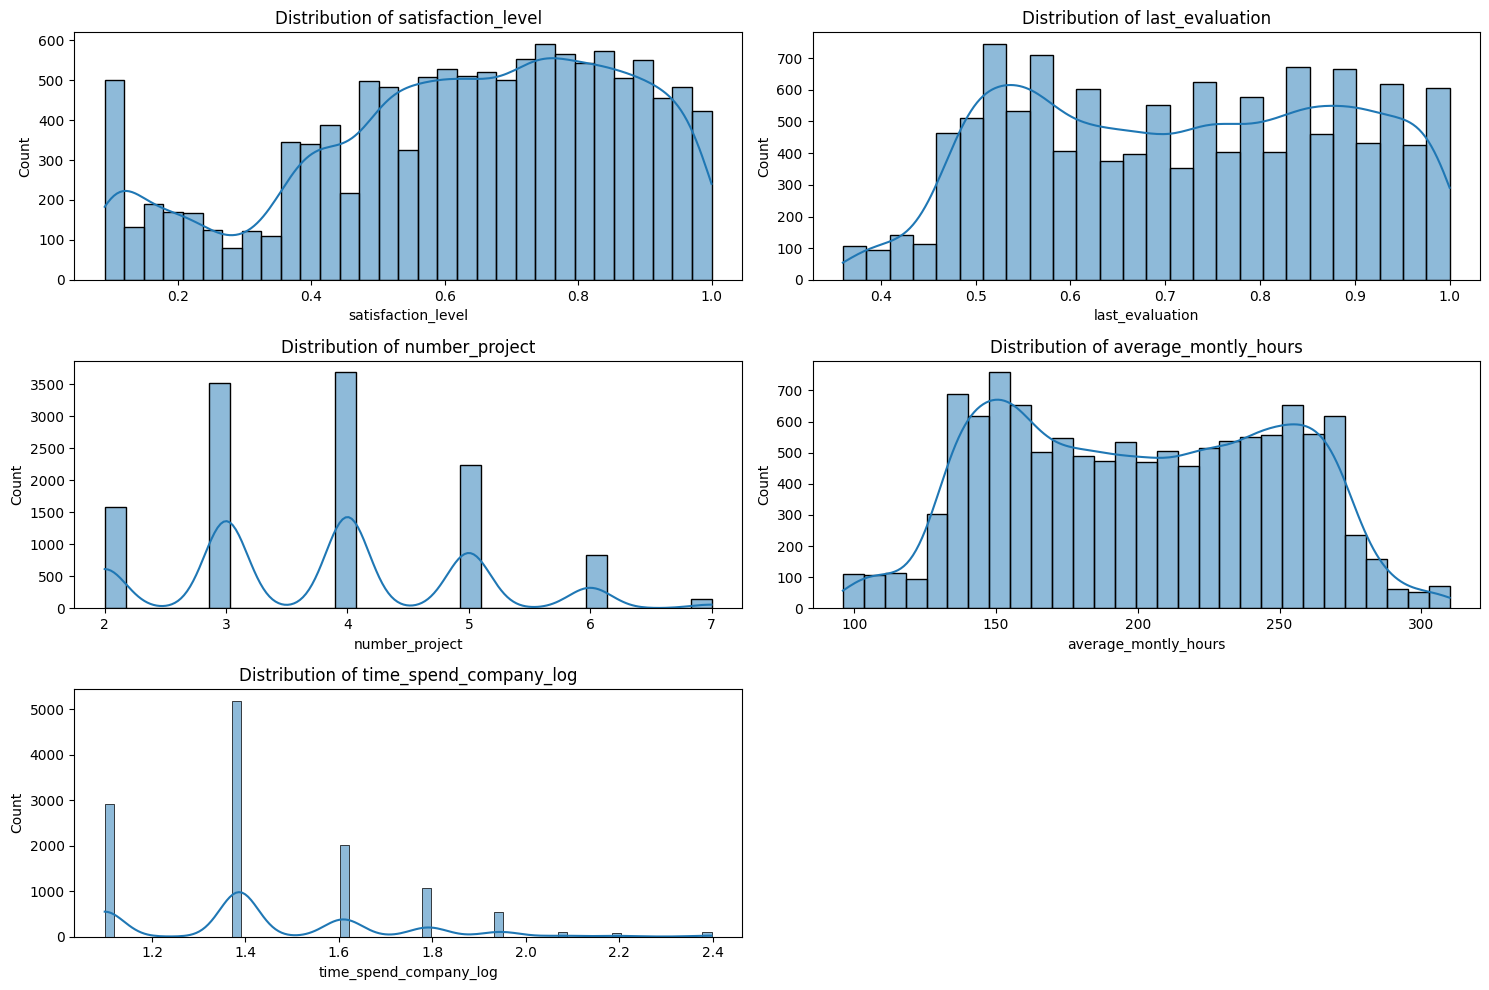

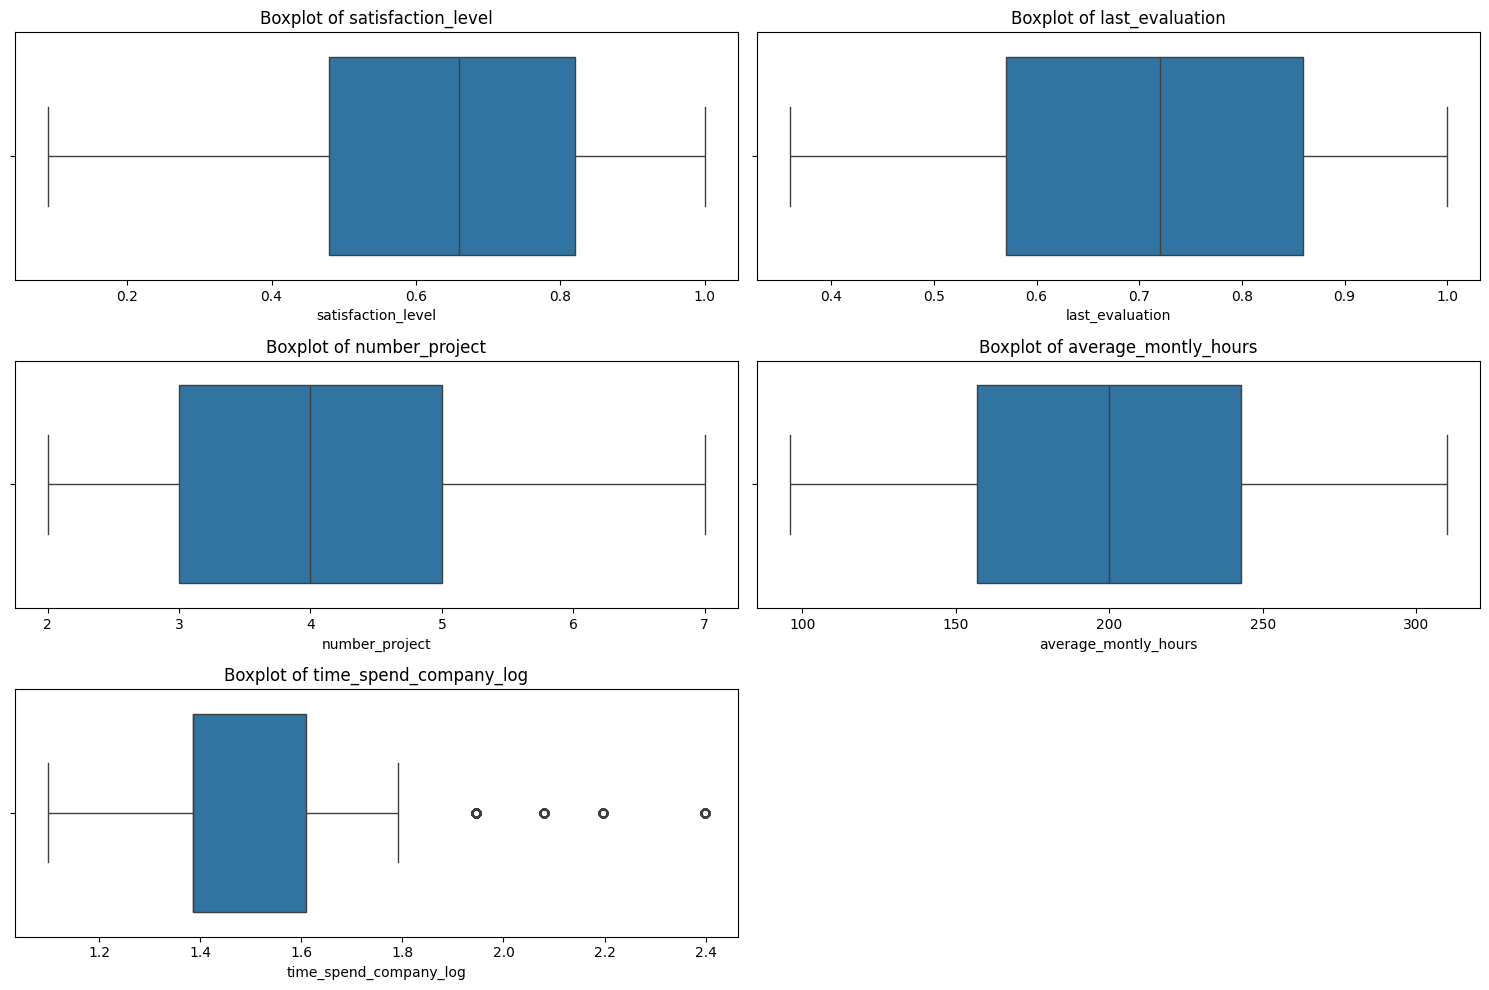

In [16]:
# Plot distributions after log transformation
plt.figure(figsize=(15, 10))
for i, column in enumerate(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company_log'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Plot boxplots after log transformation
plt.figure(figsize=(15, 10))
for i, column in enumerate(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company_log'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


<Axes: xlabel='time_spend_company', ylabel='Department'>

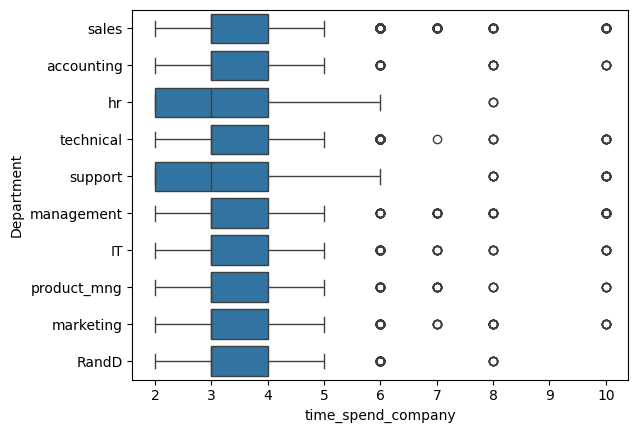

In [17]:
sns.boxplot(data=df,x='time_spend_company',y='Department')

In [18]:
df[(df['time_se'])]

KeyError: 'time_se'

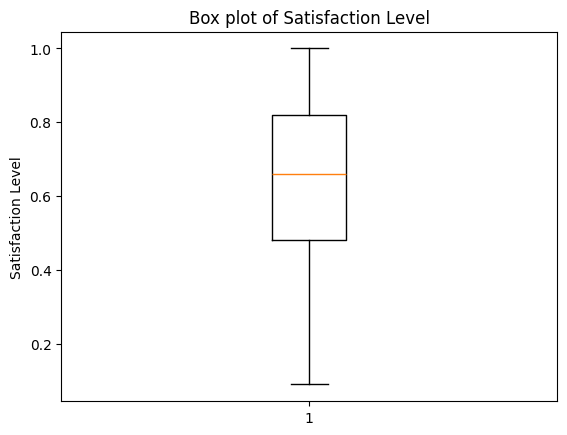

In [ ]:
plt.boxplot(df['satisfaction_level'])
plt.title('Box plot of Satisfaction Level')
plt.ylabel('Satisfaction Level')
plt.show()

In [ ]:
# Set the style of the visualizations
sns.set(style="whitegrid")

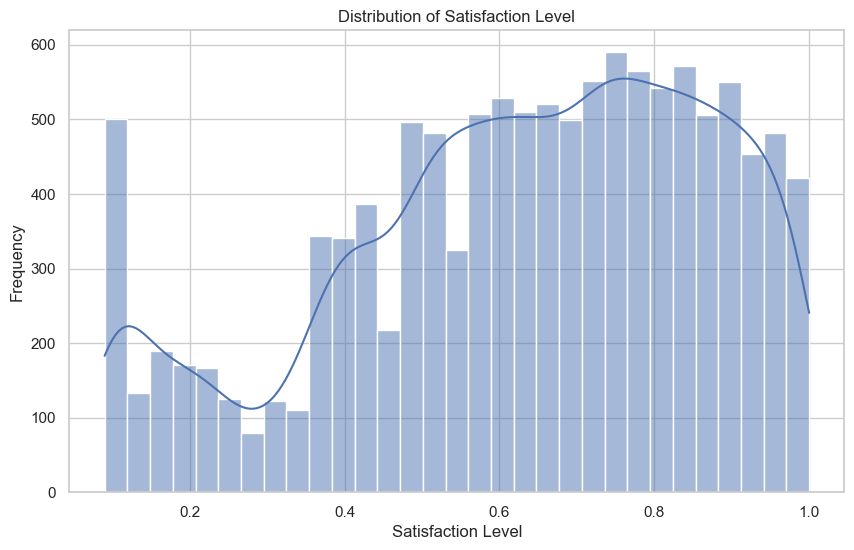

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()


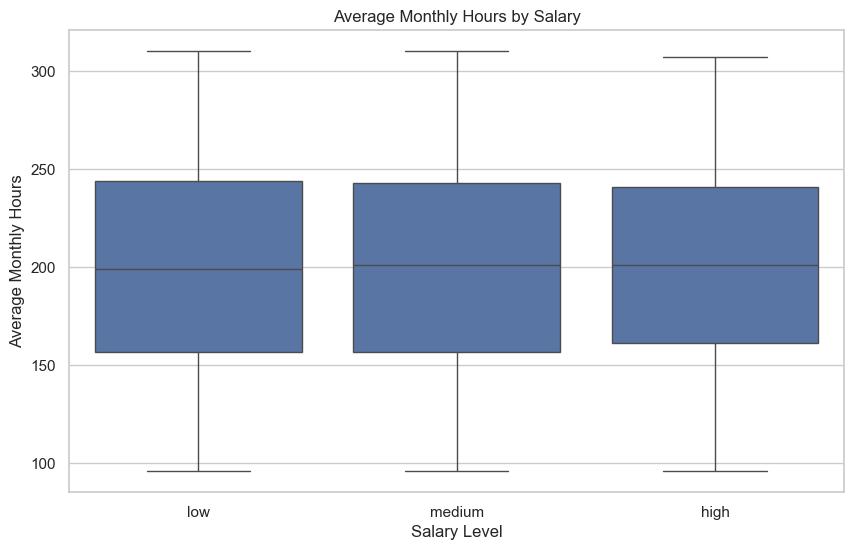

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours by Salary')
plt.xlabel('Salary Level')
plt.ylabel('Average Monthly Hours')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'sales'

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

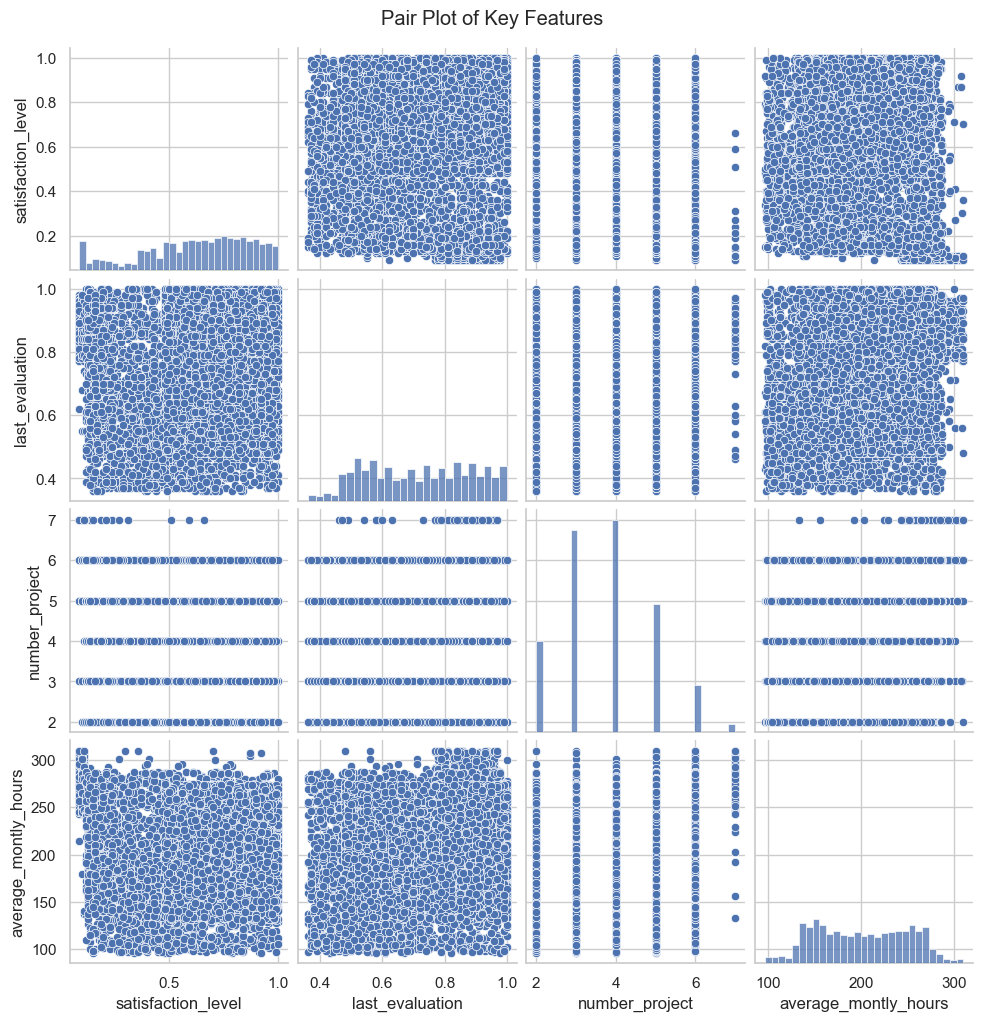

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Department']=le.fit_transform(df['Department'])

In [ ]:
df['salary']=le.fit_transform(df['salary'])

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


In [ ]:
x=df.drop('left',axis=1)
y=df['left']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(x,y,train_size=0.20,random_state=42)

In [ ]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(2398, 9)
(9593, 9)
(2398,)
(9593,)


In [ ]:
X_TRAIN.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
365,0.91,0.87,4,235,5,0,0,9,1
11977,0.62,0.72,3,149,3,1,0,5,2
147,0.11,0.87,6,306,4,0,0,0,1
1675,0.09,0.93,6,255,4,0,0,1,2
10608,0.96,0.51,4,225,3,0,0,5,2


In [ ]:
X_TEST.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
397,0.09,0.79,6,293,5,0,0,7,1
3107,0.74,0.96,4,154,4,0,0,8,2
9331,0.81,0.97,4,212,2,0,0,7,1
357,0.37,0.54,2,149,3,0,0,8,1
1326,0.10,0.77,6,272,4,0,0,2,1


In [ ]:
scaler=StandardScaler()
X_TRAIN=scaler.fit_transform(X_TRAIN)

In [ ]:
X_TEST=scaler.transform(X_TEST)

In [ ]:
X_TRAIN

array([[ 1.14240805,  0.94630758,  0.1523459 , ..., -0.15178123,
         1.11298173, -0.526132  ],
       [-0.04208809,  0.04645605, -0.71335424, ..., -0.15178123,
        -0.26116176,  1.03147855],
       [-2.12516751,  0.94630758,  1.88374617, ..., -0.15178123,
        -1.97884111, -0.526132  ],
       ...,
       [ 0.85649519, -1.09335587,  1.01804603, ..., -0.15178123,
         1.11298173,  1.03147855],
       [-0.81813728, -1.39330638, -1.57905437, ..., -0.15178123,
         0.42590999, -0.526132  ],
       [-0.6956032 , -1.81323709,  1.88374617, ..., -0.15178123,
         0.42590999, -0.526132  ]])

In [ ]:
X_TEST

array([[-2.2068569 ,  0.46638677,  1.88374617, ..., -0.15178123,
         0.42590999, -0.526132  ],
       [ 0.44804824,  1.48621849,  0.1523459 , ..., -0.15178123,
         0.76944586,  1.03147855],
       [ 0.7339611 ,  1.54620859,  0.1523459 , ..., -0.15178123,
         0.42590999, -0.526132  ],
       ...,
       [ 1.42832091, -0.85339547,  1.01804603, ...,  6.58842981,
         0.42590999, -2.08374256],
       [ 0.28466947, -0.31348455, -0.71335424, ..., -0.15178123,
        -1.63530524, -0.526132  ],
       [-0.36884565,  0.82632737,  0.1523459 , ...,  6.58842981,
         1.11298173,  1.03147855]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
desicion_model=DecisionTreeClassifier()
ramdom_model=RandomForestClassifier()
adaboots_model=AdaBoostClassifier()
Gradient_model=GradientBoostingClassifier()
xgboosts_model=XGBClassifier()
knn_model=KNeighborsClassifier()

In [ ]:
desicion_model.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier()

In [ ]:
ramdom_model.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier()

In [ ]:
adaboots_model.fit(X_TRAIN,Y_TRAIN)

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [ ]:
Gradient_model.fit(X_TRAIN,Y_TRAIN)

GradientBoostingClassifier()

In [ ]:
xgboosts_model.fit(X_TRAIN,Y_TRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
knn_model.fit(X_TRAIN,Y_TRAIN)

KNeighborsClassifier()

In [ ]:
Y_pred_ds=desicion_model.predict(X_TEST)
Y_pred_rf=ramdom_model.predict(X_TEST)
Y_pred_ad=adaboots_model.predict(X_TEST)
Y_pred_gd=Gradient_model.predict(X_TEST)
Y_pred_xg=xgboosts_model.predict(X_TEST)
Y_pred_knn=knn_model.predict(X_TEST)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('accuracy_score desicion tree')
print("desicion_model::",accuracy_score(Y_TEST,Y_pred_ds))
print()

print('accuracy_score random forest')
print("random forest::",accuracy_score(Y_TEST,Y_pred_rf))
print()

print('accuracy_score adaboosts')
print("adaboosts::",accuracy_score(Y_TEST,Y_pred_ad))
print()

print('accuracy_score gradient boots')
print("gradient boots::",accuracy_score(Y_TEST,Y_pred_gd))
print()

print('accuracy_score xg boosts')
print("xg boosts::",accuracy_score(Y_TEST,Y_pred_xg))
print()

print('accuracy_score KNN')
print("KNN::",accuracy_score(Y_TEST,Y_pred_knn))
print()



accuracy_score desicion tree
desicion_model:: 0.9669550714062337

accuracy_score random forest
random forest:: 0.9808193474408423

accuracy_score adaboosts
adaboosts:: 0.9614302095277807

accuracy_score gradient boots
gradient boots:: 0.9777963098092359

accuracy_score xg boosts
xg boosts:: 0.977587824455332

accuracy_score KNN
KNN:: 0.9509016991556343



In [ ]:
import pickle

In [ ]:
with open('weather.pkl','wb') as file:
  pickle.dump(ramdom_model,file)

In [ ]:
L=[[0.38,	0.53,	2,	157,	3,	0,	0	,7	,1	]]

In [ ]:
ramdom_model.predict(L)

array([1], dtype=int64)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


NameError: name 'fpr' is not defined

<Figure size 800x600 with 0 Axes>